In [66]:
#Python Packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os

In [67]:
'''
#Link to Google Account
from google.colab import drive
drive.mount('/content/drive')
'''

"\n#Link to Google Account\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [68]:
#Import and run the dataset
data_path = os.path.join('..', 'data', 'Raw Data.csv')

df = pd.read_csv(data_path)
df.head()

C:\Users\branh\AppData\Local\Temp\ipykernel_347992\2675586499.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,Municipality,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Person ID,Driver At Fault,Injury Severity,Circumstance,Driver Distracted By,Drivers License State,Vehicle ID,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3040003N,190026050,Montgomery County Police,Property Damage Crash,05/31/2019 03:00:00 PM,NaN,NaN,NaN,NaN,PARKING LOT OF 3215 SPARTAN RD,NaN,NaN,OTHER,CLEAR,NaN,DAYLIGHT,NaN,UNKNOWN,NaN,DE2A24CD-7919-4F8D-BABF-5B75CE12D21E,Yes,NO APPARENT INJURY,NaN,UNKNOWN,NaN,165AD539-A8C8-4004-AF73-B7DCAAA8B3CC,SUPERFICIAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,North,North,15,No,No,2004,HONDA,TK,UNKNOWN,39.150044,-77.063089,"(39.15004368, -77.06308884)"
1,EJ78850038,230034791,Gaithersburg Police Depar,Property Damage Crash,07/21/2023 05:59:00 PM,Maryland (State),FREDERICK RD,Unknown,WATKINS MILL RD,NaN,NaN,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,E7058A8E-4F18-4D2A-954E-04A099CFED12,No,NO APPARENT INJURY,NaN,NOT DISTRACTED,MD,1C3C3E2F-9A23-4ED0-9BB3-B6C370D99C37,DISABLING,THREE OCLOCK,TWO OCLOCK,PASSENGER CAR,MAKING LEFT TURN,East,South,40,No,No,2011,GMC,TK,NO MISUSE,39.159264,-77.219025,"(39.1592635, -77.21902483)"
2,MCP2009002G,230034583,Montgomery County Police,Property Damage Crash,07/20/2023 03:10:00 PM,Maryland (State),GEORGIA AVE,Maryland (State),NORBECK RD,NaN,NaN,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,2B404D6D-8DB5-4CB6-9E71-9F1B8D0A8925,Yes,NO APPARENT INJURY,NaN,NOT DISTRACTED,MD,0483CE47-E0FC-4BCA-BAB0-B7541820FEE6,FUNCTIONAL,TWELVE OCLOCK,TWELVE OCLOCK,PICKUP TRUCK,ACCELERATING,North,North,35,No,No,2019,FORD,F150,NO MISUSE,39.109535,-77.075806,"(39.10953506, -77.07580619)"
3,MCP3201004C,230035036,Montgomery County Police,Property Damage Crash,07/23/2023 12:10:00 PM,County,CRYSTAL ROCK DR,County,WATERS LANDING DR,NaN,NaN,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,NaN,637D8107-0381-4B8D-848A-B4A93B4D53CE,Yes,NO APPARENT INJURY,NaN,LOOKED BUT DID NOT SEE,MD,4406AA84-07F8-45F4-88A2-09AD89AC9AAF,FUNCTIONAL,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,STARTING FROM LANE,East,East,40,No,No,2016,KIA,SW,NO MISUSE,39.190149,-77.266766,"(39.19014917, -77.26676583)"
4,MCP23290028,230035152,Montgomery County Police,Property Damage Crash,07/24/2023 06:10:00 AM,County,MONTGOMERY VILLAGE AVE,County,CENTERWAY RD,NaN,NaN,NaN,HEAD ON LEFT TURN,CLOUDY,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,52F904CB-822C-4D8D-9457-0D66B99AD407,Yes,NO APPARENT INJURY,NaN,NOT DISTRACTED,CA,148FAA0F-4EBB-43E8-9339-BBED3F245751,FUNCTIONAL,TWELVE OCLOCK,TWELVE OCLOCK,(SPORT) UTILITY VEHICLE,MAKING LEFT TURN,West,North,35,No,No,2016,TOYT,TK,NO MISUSE,39.172558,-77.203745,"(39.17255801, -77.20374546)"


In [69]:
df['Driver At Fault'].unique()

array(['Yes', 'No', 'Unknown'], dtype=object)

In [70]:
pd.set_option('display.max_columns', None)
df.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [71]:
#Cleaning the dataset
df = df[df['ACRS Report Type'] != 'Fatal Crash']
columns_to_drop = ['Report Number','Crash Date/Time','Local Case Number','Agency Name','Route Type', 'Road Name','Cross-Street Type',
                   'Cross-Street Name', 'Off-Road Description','Municipality','Related Non-Motorist','Injury Severity',
                   'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID','Vehicle Continuing Dir', 'Vehicle Going Dir',
                   'Driverless Vehicle','Drivers License State', 'Latitude','Longitude', 'Location', 'Vehicle ID', 'Vehicle Make', 'Vehicle Model']
df_clean = df.drop(columns=columns_to_drop, axis=1)
df_clean = df_clean.dropna()

text_to_exclude = 'UNKNOWN'
condition = (df_clean == text_to_exclude).any(axis=1)
df_clean = df_clean.loc[~condition]

text_to_exclude2 = 'Unknown'
condition = (df_clean == text_to_exclude2).any(axis=1)
df_clean = df_clean.loc[~condition]

In [72]:
#Converting Y variable to 0 and 1
#df_clean = df_clean.replace({'Property Damage Crash': 1, 'Injury Crash': 0})
df_clean['ACRS Report Type']=df_clean['ACRS Report Type'].astype('category').cat.codes

In [73]:
df_clean.head()

,ACRS Report Type,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver At Fault,Circumstance,Driver Distracted By,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Speed Limit,Parked Vehicle,Vehicle Year,Equipment Problems
6,1,SAME DIR REAR END,CLEAR,DRY,DUSK,NO CONTROLS,Yes,"ANIMAL, N/A",NOT DISTRACTED,DISABLING,TWELVE OCLOCK,TWELVE OCLOCK,(SPORT) UTILITY VEHICLE,SLOWING OR STOPPING,25,No,2014,NO MISUSE
30,0,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NO CONTROLS,Yes,"ANIMAL, BACKUP DUE TO NON-RECURRING INCIDENT",OTHER DISTRACTION,DISABLING,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,35,No,2014,NO MISUSE
38,0,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NO CONTROLS,No,"ANIMAL, BACKUP DUE TO NON-RECURRING INCIDENT",NOT DISTRACTED,DISABLING,SIX OCLOCK,SIX OCLOCK,PASSENGER CAR,STOPPED IN TRAFFIC LANE,35,No,2010,NO MISUSE
67,1,SAME DIR BOTH LEFT TURN,RAINING,WET,DAYLIGHT,TRAFFIC SIGNAL,No,"N/A, WET",NOT DISTRACTED,FUNCTIONAL,TEN OCLOCK,TEN OCLOCK,PASSENGER CAR,MAKING LEFT TURN,35,No,2007,NO MISUSE
121,0,SINGLE VEHICLE,CLOUDY,WET,DAWN,NO CONTROLS,Yes,"N/A, WET",INATTENTIVE OR LOST IN THOUGHT,DESTROYED,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,40,No,2004,NO MISUSE


In [74]:
df_clean.nunique()

ACRS Report Type                    2
Collision Type                     17
Weather                            11
Surface Condition                   9
Light                               7
Traffic Control                    10
Driver At Fault                     2
Circumstance                      153
Driver Distracted By               18
Vehicle Damage Extent               6
Vehicle First Impact Location      15
Vehicle Second Impact Location     15
Vehicle Body Type                  28
Vehicle Movement                   21
Speed Limit                        15
Parked Vehicle                      2
Vehicle Year                       52
Equipment Problems                  8
dtype: int64

In [75]:
#Replace minority values to "Other"
df_clean['Collision Type']=df_clean['Collision Type'].replace(['OTHER', 'HEAD ON', 'SAME DIRECTION LEFT TURN', 'SAME DIRECTION RIGHT TURN',
                                    'ANGLE MEETS LEFT TURN', 'OPPOSITE DIRECTION SIDESWIPE', 'ANGLE MEETS RIGHT TURN',
                                    'SAME DIR REND LEFT TURN', 'ANGLE MEETS LEFT HEAD ON', 'SAME DIR REND RIGHT TURN',
                                    'SAME DIR BOTH LEFT TURN', 'OPPOSITE DIR BOTH LEFT TURN'], 'OTHER')

df_clean['Weather']=df_clean['Weather'].replace(['SNOW', 'FOGGY', 'WINTRY MIX', 'OTHER', 'SLEET', 'BLOWING SNOW', 'SEVERE WINDS',
                                    'BLOWING SAND, SOIL, DIRT'], 'OTHER')

df_clean['Surface Condition']=df_clean['Surface Condition'].replace(['ICE', 'SNOW', 'SLUSH', 'OTHER', 'WATER(STANDING/MOVING)', 'OIL',
                                    'MUD, DIRT, GRAVEL'], 'OTHER')

df_clean['Light']=df_clean['Light'].replace(['DARK NO LIGHTS', 'DAWN', 'DUSK', 'DARK -- UNKNOWN LIGHTING', 'OTHER',], 'DARK/OTHER')

df_clean['Traffic Control']=df_clean['Traffic Control'].replace(['FLASHING TRAFFIC SIGNAL', 'OTHER', 'YIELD SIGN', 'PERSON', 'WARNING SIGN',
                                                                 'RAILWAY CROSSING DEVICE', 'SCHOOL ZONE SIGN DEVICE'], 'OTHER')

df_clean['Circumstance'] = df_clean['Circumstance'].where(df_clean['Circumstance'].isin(['RAIN, SNOW, WET', 'N/A, WET']), 'OTHER')

df_clean['Driver Distracted By'] = df_clean['Driver Distracted By'].where(df_clean['Driver Distracted By'].isin(['NOT DISTRACTED', 'LOOKED BUT DID NOT SEE']),
                                                                          'OTHER')

df_clean['Vehicle First Impact Location']=df_clean['Vehicle First Impact Location'].replace(['TWELVE OCLOCK'], 'FRONT')
df_clean['Vehicle First Impact Location']=df_clean['Vehicle First Impact Location'].replace(['SIX OCLOCK'], 'BACK')
df_clean['Vehicle First Impact Location']=df_clean['Vehicle First Impact Location'].replace(['ONE OCLOCK', 'TWO OCLOCK', 'THREE OCLOCK', 'FOUR OCLOCK',
                                                                                             'FIVE OCLOCK'], 'RIGHT SIDE')
df_clean['Vehicle First Impact Location']=df_clean['Vehicle First Impact Location'].replace(['SEVEN OCLOCK', 'EIGHT OCLOCK', 'NINE OCLOCK', 'TEN OCLOCK',
                                                                                             'ELEVEN OCLOCK'], 'LEFT SIDE')
df_clean['Vehicle First Impact Location']=df_clean['Vehicle First Impact Location'].replace(['UNDERSIDE', 'NON-COLLISION', 'ROOF TOP'], 'OTHER')

df_clean['Vehicle Second Impact Location']=df_clean['Vehicle Second Impact Location'].replace(['TWELVE OCLOCK'], 'FRONT')
df_clean['Vehicle Second Impact Location']=df_clean['Vehicle Second Impact Location'].replace(['SIX OCLOCK'], 'BACK')
df_clean['Vehicle Second Impact Location']=df_clean['Vehicle Second Impact Location'].replace(['ONE OCLOCK', 'TWO OCLOCK', 'THREE OCLOCK', 'FOUR OCLOCK',
                                                                                             'FIVE OCLOCK'], 'RIGHT SIDE')
df_clean['Vehicle Second Impact Location']=df_clean['Vehicle Second Impact Location'].replace(['SEVEN OCLOCK', 'EIGHT OCLOCK', 'NINE OCLOCK', 'TEN OCLOCK',
                                                                                             'ELEVEN OCLOCK'], 'LEFT SIDE')
df_clean['Vehicle Second Impact Location']=df_clean['Vehicle Second Impact Location'].replace(['UNDERSIDE', 'NON-COLLISION', 'ROOF TOP'], 'OTHER')

df_clean['Vehicle Body Type'] = df_clean['Vehicle Body Type'].where(df_clean['Vehicle Body Type'].isin(['PASSENGER CAR']), 'OTHER')

df_clean['Vehicle Movement'] = df_clean['Vehicle Movement'].where(df_clean['Vehicle Movement'].isin(['MOVING CONSTANT SPEED', 'SLOWING OR STOPPING',
                                                                                                     'STOPPED IN TRAFFIC LANE', 'MAKING LEFT TURN',
                                                                                                     'ACCELERATING', 'STARTING FROM LANE',
                                                                                                     'MAKING RIGHT TURN', 'CHANGING LANES', 'SKIDDING']), 'OTHER')



In [76]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16566 entries, 6 to 172103
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ACRS Report Type                16566 non-null  int8  
 1   Collision Type                  16566 non-null  object
 2   Weather                         16566 non-null  object
 3   Surface Condition               16566 non-null  object
 4   Light                           16566 non-null  object
 5   Traffic Control                 16566 non-null  object
 6   Driver At Fault                 16566 non-null  object
 7   Circumstance                    16566 non-null  object
 8   Driver Distracted By            16566 non-null  object
 9   Vehicle Damage Extent           16566 non-null  object
 10  Vehicle First Impact Location   16566 non-null  object
 11  Vehicle Second Impact Location  16566 non-null  object
 12  Vehicle Body Type               16566 non-null  ob

In [77]:
df_clean

,ACRS Report Type,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver At Fault,Circumstance,Driver Distracted By,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Speed Limit,Parked Vehicle,Vehicle Year,Equipment Problems
6,1,SAME DIR REAR END,CLEAR,DRY,DARK/OTHER,NO CONTROLS,Yes,OTHER,NOT DISTRACTED,DISABLING,FRONT,FRONT,OTHER,SLOWING OR STOPPING,25,No,2014,NO MISUSE
30,0,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NO CONTROLS,Yes,OTHER,OTHER,DISABLING,FRONT,FRONT,PASSENGER CAR,MOVING CONSTANT SPEED,35,No,2014,NO MISUSE
38,0,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NO CONTROLS,No,OTHER,NOT DISTRACTED,DISABLING,BACK,BACK,PASSENGER CAR,STOPPED IN TRAFFIC LANE,35,No,2010,NO MISUSE
67,1,OTHER,RAINING,WET,DAYLIGHT,TRAFFIC SIGNAL,No,"N/A, WET",NOT DISTRACTED,FUNCTIONAL,LEFT SIDE,LEFT SIDE,PASSENGER CAR,MAKING LEFT TURN,35,No,2007,NO MISUSE
121,0,SINGLE VEHICLE,CLOUDY,WET,DARK/OTHER,NO CONTROLS,Yes,"N/A, WET",OTHER,DESTROYED,FRONT,FRONT,PASSENGER CAR,MOVING CONSTANT SPEED,40,No,2004,NO MISUSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172080,1,STRAIGHT MOVEMENT ANGLE,CLOUDY,WET,DAYLIGHT,STOP SIGN,Yes,"N/A, WET",OTHER,FUNCTIONAL,FRONT,FRONT,PASSENGER CAR,OTHER,30,No,2012,NO MISUSE
172083,0,SAME DIR REAR END,CLEAR,WET,DAYLIGHT,NO CONTROLS,No,"N/A, WET",NOT DISTRACTED,FUNCTIONAL,BACK,BACK,OTHER,SLOWING OR STOPPING,30,No,2010,NO MISUSE
172084,1,OTHER,RAINING,WET,DARK/OTHER,NO CONTROLS,Yes,"RAIN, SNOW, WET",LOOKED BUT DID NOT SEE,DISABLING,RIGHT SIDE,RIGHT SIDE,PASSENGER CAR,CHANGING LANES,45,No,2017,NO MISUSE
172093,1,SINGLE VEHICLE,RAINING,WET,DAYLIGHT,NO CONTROLS,Yes,"RAIN, SNOW, WET",NOT DISTRACTED,DISABLING,FRONT,FRONT,PASSENGER CAR,MOVING CONSTANT SPEED,35,No,2009,NO MISUSE


One Hot Encoding

In [78]:
#One-hot encoding

df_oh=df_clean
df_oh.head()

,ACRS Report Type,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver At Fault,Circumstance,Driver Distracted By,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Speed Limit,Parked Vehicle,Vehicle Year,Equipment Problems
6,1,SAME DIR REAR END,CLEAR,DRY,DARK/OTHER,NO CONTROLS,Yes,OTHER,NOT DISTRACTED,DISABLING,FRONT,FRONT,OTHER,SLOWING OR STOPPING,25,No,2014,NO MISUSE
30,0,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NO CONTROLS,Yes,OTHER,OTHER,DISABLING,FRONT,FRONT,PASSENGER CAR,MOVING CONSTANT SPEED,35,No,2014,NO MISUSE
38,0,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NO CONTROLS,No,OTHER,NOT DISTRACTED,DISABLING,BACK,BACK,PASSENGER CAR,STOPPED IN TRAFFIC LANE,35,No,2010,NO MISUSE
67,1,OTHER,RAINING,WET,DAYLIGHT,TRAFFIC SIGNAL,No,"N/A, WET",NOT DISTRACTED,FUNCTIONAL,LEFT SIDE,LEFT SIDE,PASSENGER CAR,MAKING LEFT TURN,35,No,2007,NO MISUSE
121,0,SINGLE VEHICLE,CLOUDY,WET,DARK/OTHER,NO CONTROLS,Yes,"N/A, WET",OTHER,DESTROYED,FRONT,FRONT,PASSENGER CAR,MOVING CONSTANT SPEED,40,No,2004,NO MISUSE


In [79]:
#One-hot encoding

df_oh['ACRS Report Type']=df_oh['ACRS Report Type'].astype('category').cat.codes
df_oh['Collision Type']=df_oh['Collision Type'].astype('category').cat.codes
df_oh['Weather']=df_oh['Weather'].astype('category').cat.codes
df_oh['Surface Condition']=df_oh['Surface Condition'].astype('category').cat.codes
df_oh['Light']=df_oh['Light'].astype('category').cat.codes
df_oh['Traffic Control']=df_oh['Traffic Control'].astype('category').cat.codes
df_oh['Driver At Fault']=df_oh['Driver At Fault'].astype('category').cat.codes
df_oh['Circumstance']=df_oh['Circumstance'].astype('category').cat.codes
df_oh['Driver Distracted By']=df_oh['Driver Distracted By'].astype('category').cat.codes
df_oh['Vehicle Damage Extent']=df_oh['Vehicle Damage Extent'].astype('category').cat.codes
df_oh['Vehicle First Impact Location']=df_oh['Vehicle First Impact Location'].astype('category').cat.codes
df_oh['Vehicle Second Impact Location']=df_oh['Vehicle Second Impact Location'].astype('category').cat.codes
df_oh['Vehicle Body Type']=df_oh['Vehicle Body Type'].astype('category').cat.codes
df_oh['Vehicle Movement']=df_oh['Vehicle Movement'].astype('category').cat.codes
df_oh['Parked Vehicle']=df_oh['Parked Vehicle'].astype('category').cat.codes
df_oh['Equipment Problems']=df_oh['Equipment Problems'].astype('category').cat.codes

In [80]:
df_oh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16566 entries, 6 to 172103
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   ACRS Report Type                16566 non-null  int8 
 1   Collision Type                  16566 non-null  int8 
 2   Weather                         16566 non-null  int8 
 3   Surface Condition               16566 non-null  int8 
 4   Light                           16566 non-null  int8 
 5   Traffic Control                 16566 non-null  int8 
 6   Driver At Fault                 16566 non-null  int8 
 7   Circumstance                    16566 non-null  int8 
 8   Driver Distracted By            16566 non-null  int8 
 9   Vehicle Damage Extent           16566 non-null  int8 
 10  Vehicle First Impact Location   16566 non-null  int8 
 11  Vehicle Second Impact Location  16566 non-null  int8 
 12  Vehicle Body Type               16566 non-null  int8 
 13  Vehic

In [81]:
correlation = df_oh.corr()
correlation

,ACRS Report Type,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver At Fault,Circumstance,Driver Distracted By,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Speed Limit,Parked Vehicle,Vehicle Year,Equipment Problems
ACRS Report Type,1.000000,0.031159,-0.031515,-0.034620,-0.011753,-0.069928,0.032688,-0.029687,0.013876,0.085646,0.077971,0.079578,-0.047989,0.000502,-0.042199,0.014202,-0.000742,0.022206
Collision Type,0.031159,1.000000,-0.016669,-0.025123,-0.039600,-0.024024,0.105873,-0.005436,-0.018612,-0.123339,0.164096,0.161123,0.005587,-0.158159,-0.053282,-0.020941,0.009755,-0.007006
Weather,-0.031515,-0.016669,1.000000,0.635596,-0.102306,0.094848,0.002369,0.424508,-0.028552,-0.023119,0.011363,0.007559,0.058628,-0.014553,-0.019686,-0.001607,-0.015464,-0.003317
Surface Condition,-0.034620,-0.025123,0.635596,1.000000,-0.103342,0.122826,0.010937,0.082274,-0.013024,-0.045207,0.000307,-0.006219,0.089454,-0.014413,-0.005816,0.000529,-0.025701,-0.002597
Light,-0.011753,-0.039600,-0.102306,-0.103342,1.000000,-0.047087,-0.019338,-0.033775,0.015441,0.046700,-0.043133,-0.042934,-0.058258,0.089302,-0.032934,0.004059,-0.003455,-0.013592
Traffic Control,-0.069928,-0.024024,0.094848,0.122826,-0.047087,1.000000,-0.078515,0.021681,-0.031241,0.040389,-0.044122,-0.042071,0.044907,0.057443,0.031445,-0.042890,0.011164,-0.006517
Driver At Fault,0.032688,0.105873,0.002369,0.010937,-0.019338,-0.078515,1.000000,0.013583,-0.149252,-0.175934,0.229053,0.228195,0.027799,-0.341967,-0.049097,-0.049785,0.002356,-0.019429
Circumstance,-0.029687,-0.005436,0.424508,0.082274,-0.033775,0.021681,0.013583,1.000000,-0.010038,-0.005892,-0.020831,-0.021307,-0.006383,0.022411,0.016892,-0.015328,-0.001714,0.003210
Driver Distracted By,0.013876,-0.018612,-0.028552,-0.013024,0.015441,-0.031241,-0.149252,-0.010038,1.000000,-0.011038,-0.089559,-0.094511,-0.000082,0.150471,0.036386,0.009274,-0.022079,-0.001530
Vehicle Damage Extent,0.085646,-0.123339,-0.023119,-0.045207,0.046700,0.040389,-0.175934,-0.005892,-0.011038,1.000000,-0.099369,-0.098179,-0.163027,0.216280,-0.093756,0.042357,0.002885,0.020800


<Axes: >

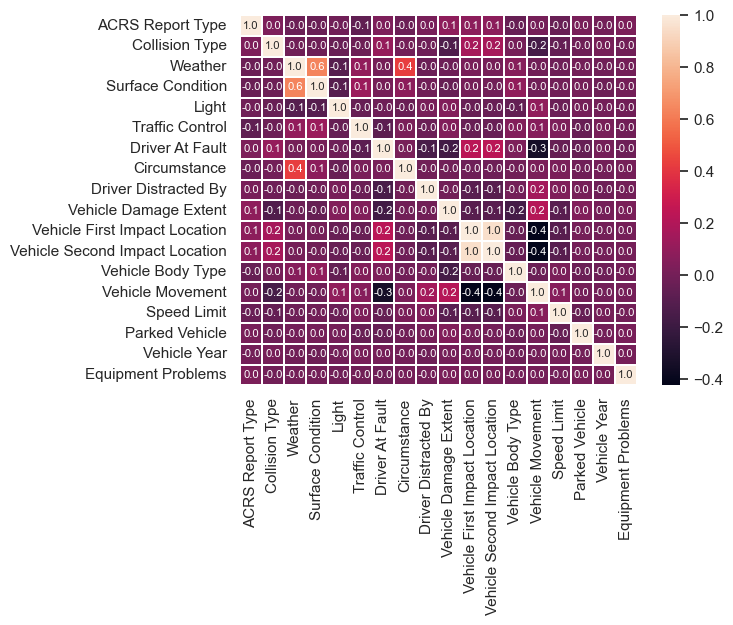

In [82]:
sns.heatmap(correlation, annot = True, fmt = ".1f", linewidth = .010, annot_kws={"size":8})

In [83]:
#Transfer Categorical Variables to Dummies

#Check the unique values in each categorical column
for column in df_clean.select_dtypes(include=['object']):
    unique_values = df_clean[column].nunique()
    print(f"{column}: {unique_values} unique values")
#Vehicle Make: 439 unique values; Vehicle Model: 1578 unique values


In [84]:
#Exclude High Cardinality Columns
high_cardinality_cols = ['Vehicle ID', 'Vehicle Make', 'Vehicle Model']
categorical_columns = [col for col in df_clean.select_dtypes(include=['object']).columns if col not in high_cardinality_cols]

#Create dummies
df_with_dummies = pd.get_dummies(df_clean, columns=categorical_columns, drop_first=True)

#Drop high cardinality columns from the dataframe with dummies
#df_with_dummies = df_with_dummies.drop(high_cardinality_cols, axis=1)

#Convert boolean columns to int
df_with_dummies = df_with_dummies.astype(int)

In [85]:
#Save the Transformed DataFrame
df_with_dummies.to_csv('cleaned_data.csv', index=False)

In [86]:
#Print info of the transformed dataframe
print(df_with_dummies.info())

#Print first few rows of the transformed dataframe to verify
print(df_with_dummies.head())

<class 'pandas.core.frame.DataFrame'>
Index: 16566 entries, 6 to 172103
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   ACRS Report Type                16566 non-null  int64
 1   Collision Type                  16566 non-null  int64
 2   Weather                         16566 non-null  int64
 3   Surface Condition               16566 non-null  int64
 4   Light                           16566 non-null  int64
 5   Traffic Control                 16566 non-null  int64
 6   Driver At Fault                 16566 non-null  int64
 7   Circumstance                    16566 non-null  int64
 8   Driver Distracted By            16566 non-null  int64
 9   Vehicle Damage Extent           16566 non-null  int64
 10  Vehicle First Impact Location   16566 non-null  int64
 11  Vehicle Second Impact Location  16566 non-null  int64
 12  Vehicle Body Type               16566 non-null  int64
 13  Vehic